# Data Exploration and Processing

This notebook demonstrates the usage of data ingestion and processing classes from our ML pipeline.
We'll explore the loan data, clarity data, and payment data, then process them for feature engineering.

In [35]:
# Import required libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set up logging
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Add the project root directory to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

# Import custom modules
from src.data import DataIngestion, DataProcessor

## 1. Data Ingestion

Set up configurations and instantiate the DataIngestion class.

In [19]:
# Configure data sources
data_source_config = {
    'loan_data': {'path': '../data/raw/loan.csv'},
    'clarity_data': {'path': '../data/raw/clarity_underwriting_variables.csv'},
    'payment_data': {'path': '../data/raw/payment.csv'}
}

# Configure data storage
data_storage_config = {
    'processed_data_dir': '../data/processed',
    'features_dir': '../data/features'
}

# Initialize DataIngestion
data_ingestion = DataIngestion(data_source_config, data_storage_config)

## 2. Advanced Data Ingestion

### 2.1 Load and Filter Loan Data

In [20]:
# Ingest loan data with advanced filtering
loan_df = data_ingestion.ingest_loan_data()

print("Filtered Loan Data Shape:", loan_df.shape)
print("\nLoan Status Distribution:")
print(loan_df['loanStatus'].value_counts(normalize=True).round(4) * 100)

# Display a few rows with key columns
display_columns = [
    'loanId', 'loanStatus', 'loanAmount', 'apr', 
    'clarityFraudId', 'leadType', 'nPaidOff'
]
print("\nSample of Filtered Loan Data:")
display(loan_df[display_columns].head())

2025-04-16 11:58:23,557 - src.data - INFO - Ingesting and filtering loan data
2025-04-16 11:58:24,434 - src.data - INFO - Loan Status Distribution for Approved Loans:
2025-04-16 11:58:24,434 - src.data - INFO - loanStatus
Paid Off Loan                  0.285418
External Collection            0.283095
New Loan                       0.202618
Internal Collection            0.138975
Returned Item                  0.029523
Settlement Paid Off            0.017684
Credit Return Void             0.017509
Customer Voided New Loan       0.008342
Settled Bankruptcy             0.008118
Pending Paid Off               0.004221
Charged Off Paid Off           0.003971
CSR Voided New Loan            0.000200
Pending Rescind                0.000100
Withdrawn Application          0.000100
Voided New Loan                0.000050
Charged Off                    0.000025
Customver Voided New Loan      0.000025
Settlement Pending Paid Off    0.000025
Name: proportion, dtype: float64
2025-04-16 11:58:24,439 -

Filtered Loan Data Shape: (40036, 19)

Loan Status Distribution:
loanStatus
Paid Off Loan                  28.54
External Collection            28.31
New Loan                       20.26
Internal Collection            13.90
Returned Item                   2.95
Settlement Paid Off             1.77
Credit Return Void              1.75
Customer Voided New Loan        0.83
Settled Bankruptcy              0.81
Pending Paid Off                0.42
Charged Off Paid Off            0.40
CSR Voided New Loan             0.02
Pending Rescind                 0.01
Withdrawn Application           0.01
Voided New Loan                 0.00
Charged Off                     0.00
Customver Voided New Loan       0.00
Settlement Pending Paid Off     0.00
Name: proportion, dtype: float64

Sample of Filtered Loan Data:


,loanId,loanStatus,loanAmount,apr,clarityFraudId,leadType,nPaidOff
1,LL-I-06644937,Paid Off Loan,3000.0,199.0,569eb3a3e4b096699f685d64,prescreen,0.0
15,LL-I-12263369,New Loan,350.0,475.0,NaN,organic,2.0
33,LL-I-17826953,New Loan,400.0,645.0,58b6eef8e4b0b6fca82fd426,lead,0.0
47,LL-I-16519347,Paid Off Loan,1250.0,490.0,58450a15e4b0bb9d6d7344c7,organic,2.0
54,LL-I-11506719,Paid Off Loan,800.0,590.0,578f9346e4b0810ad5e7b72e,bvMandatory,0.0


### 2.2 Load Clarity Data

In [21]:
# Ingest clarity data
clarity_df = data_ingestion.ingest_clarity_data()

print("\nClarity Data Shape:", clarity_df.shape)
print("\nClarity Data Columns:")
print(clarity_df.columns)

# Examine fraud scores
if 'clearfraudscore' in clarity_df.columns:
    print("\nClarity Fraud Score Distribution:")
    print(clarity_df['clearfraudscore'].describe())

2025-04-16 11:58:24,485 - src.data - INFO - Ingesting clarity data
2025-04-16 11:58:24,634 - src.data - INFO - Successfully ingested clarity data with 49752 rows and 54 columns



Clarity Data Shape: (49752, 54)

Clarity Data Columns:
Index(['.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators',
       '.underwritingdataclarity.cle

### 2.3 Load Payment Data

In [22]:
# Ingest payment data
payment_df = data_ingestion.ingest_payment_data()

print("\nPayment Data Shape:", payment_df.shape)
print("\nPayment Status Distribution:")
print(payment_df['paymentStatus'].value_counts(normalize=True).round(4) * 100)

2025-04-16 11:58:24,658 - src.data - INFO - Ingesting payment data
2025-04-16 11:58:24,942 - src.data - INFO - Successfully ingested payment data with 689364 rows and 9 columns



Payment Data Shape: (689364, 9)

Payment Status Distribution:
paymentStatus
Cancelled                  51.46
Checked                    39.90
Rejected                    6.15
Pending                     1.76
Skipped                     0.72
Rejected Awaiting Retry     0.00
Returned                    0.00
Complete                    0.00
Name: proportion, dtype: float64


## 3. Data Processing Configuration

Now that we have our data loaded, let's process it using the DataProcessor class.

In [23]:
# Configure feature engineering
feature_config = {
    'create_interactions': True,
    'polynomial_features': True,
    'polynomial_features_list': ['loanAmount', 'apr', 'clearfraudscore'],
    'categorical_encoding': 'target',
    'drop_low_variance': True,
    'variance_threshold': 0.01
}

# Initialize DataProcessor
data_processor = DataProcessor(feature_config)

## 4. Advanced Data Processing

In [24]:
# Process data with advanced feature engineering
processed_df = data_processor.process(loan_df, clarity_df, payment_df)

print("\nProcessed Data Shape:", processed_df.shape)
print("\nNumeric Features:", data_processor.numeric_features)
print("\nCategorical Features:", data_processor.categorical_features)

2025-04-16 11:58:24,991 - src.data - INFO - Processing data for feature engineering
2025-04-16 11:58:24,991 - src.data - INFO - Joining loan data with clarity fraud score
2025-04-16 11:58:25,015 - src.data - INFO - Fraud Score Distribution:
2025-04-16 11:58:25,015 - src.data - INFO - count    32205.000000
mean       685.474709
std        127.222257
min        122.000000
25%        594.000000
50%        693.000000
75%        784.000000
max        965.000000
Name: clearfraudscore, dtype: float64
2025-04-16 11:58:25,016 - src.data - INFO - Adding payment history features
2025-04-16 11:58:26,709 - src.data - INFO - Preprocessing date columns
2025-04-16 11:58:26,742 - src.data - INFO - Handling missing values
2025-04-16 11:58:26,756 - src.data - INFO - Column nPaidOff has 0.05% missing values
2025-04-16 11:58:26,758 - src.data - INFO - Column clearfraudscore has 19.56% missing values
2025-04-16 11:58:26,760 - src.data - INFO - Column application_year has 0.09% missing values
2025-04-16 11:5


Processed Data Shape: (40036, 39)

Numeric Features: ['clearfraudscore', 'paymentAmount_mean', 'paymentAmount_sum', 'paymentAmount_count', 'principal_mean', 'principal_sum', 'fees_mean', 'fees_sum', 'payment_success_rate', 'application_year', 'application_month', 'application_day', 'application_dayofweek', 'application_hour', 'days_to_origination', 'clearfraudscore_missing', 'loanAmount_x_apr', 'loanAmount_squared', 'apr_squared', 'clearfraudscore_squared']

Categorical Features: ['fpStatus', 'clarityFraudId', 'underwritingid']


## 5. Comprehensive Feature Analysis

### 5.1 Numeric Feature Correlation

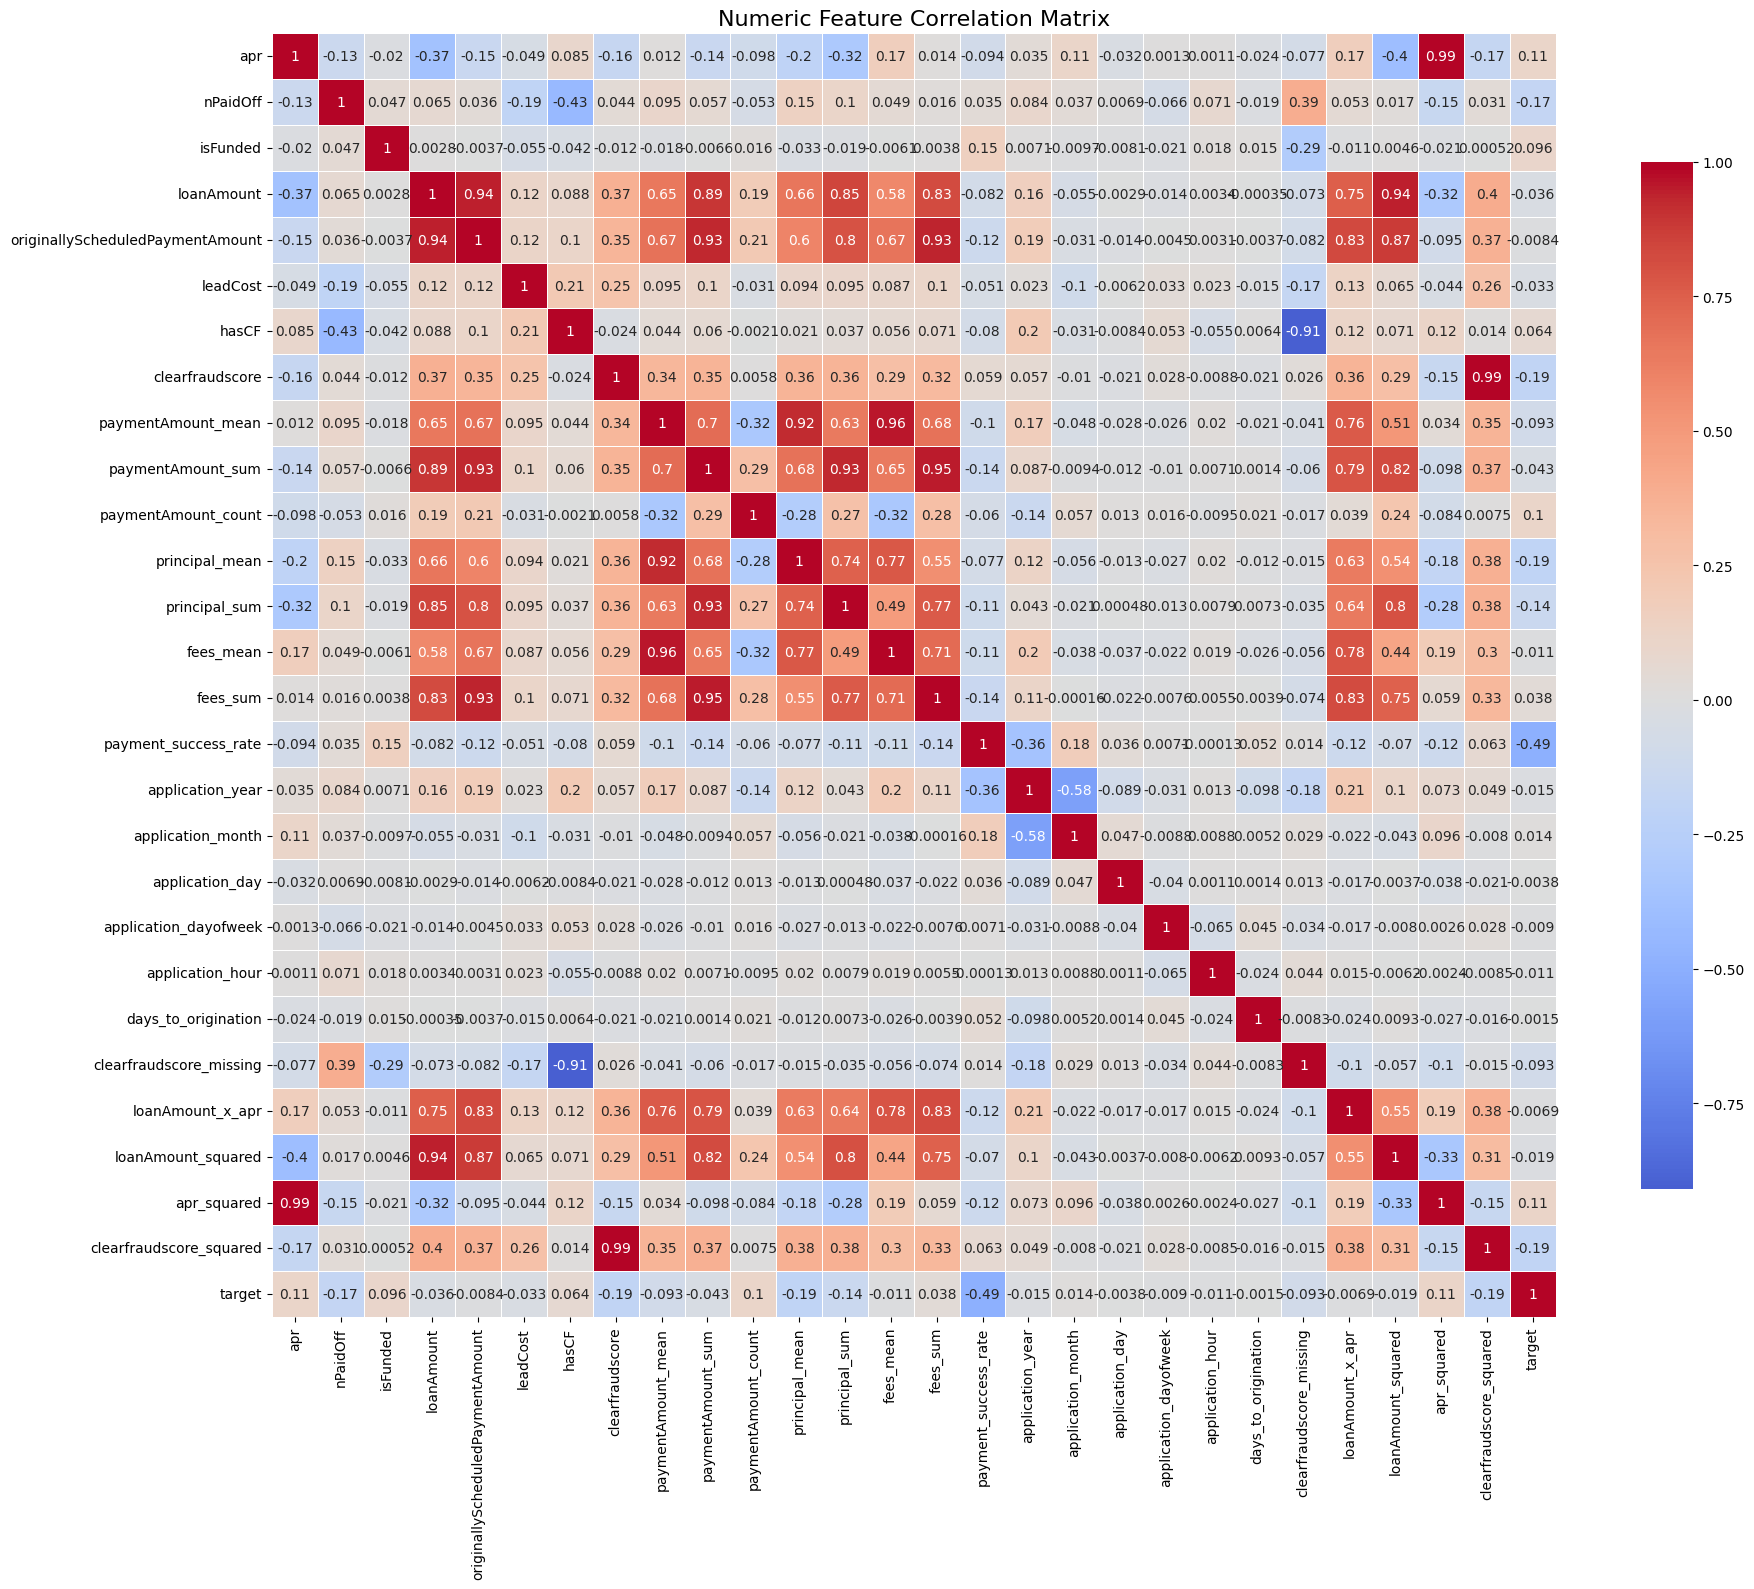

In [25]:
# Select numeric features for correlation analysis
numeric_features = processed_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = processed_df[numeric_features].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Numeric Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

### 5.2 Feature-Target Relationships

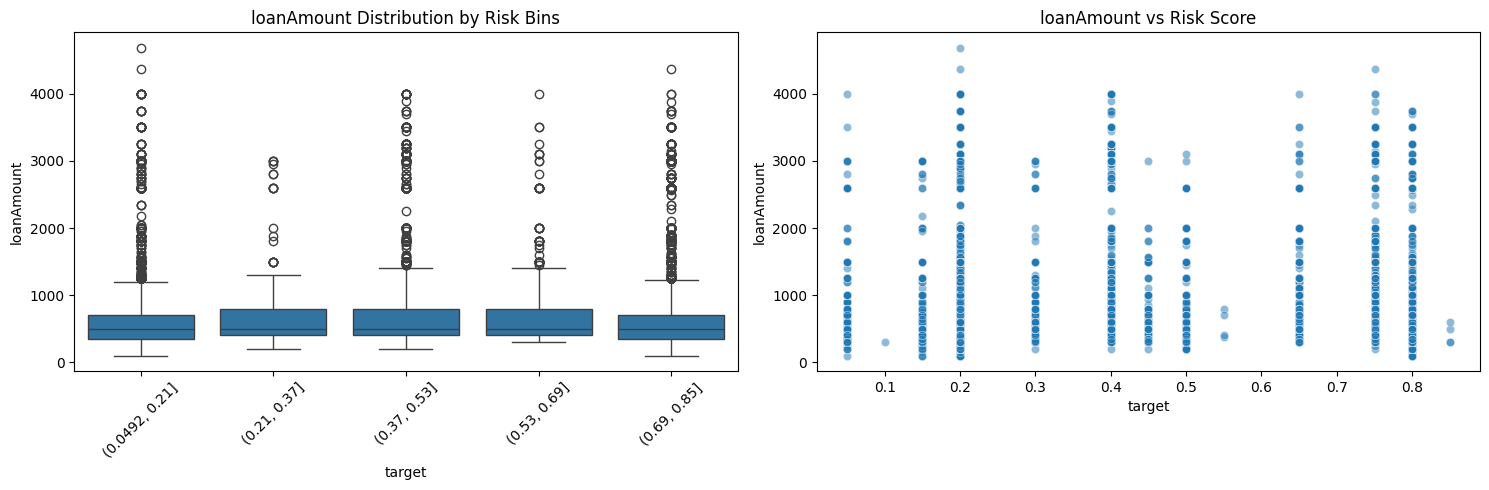

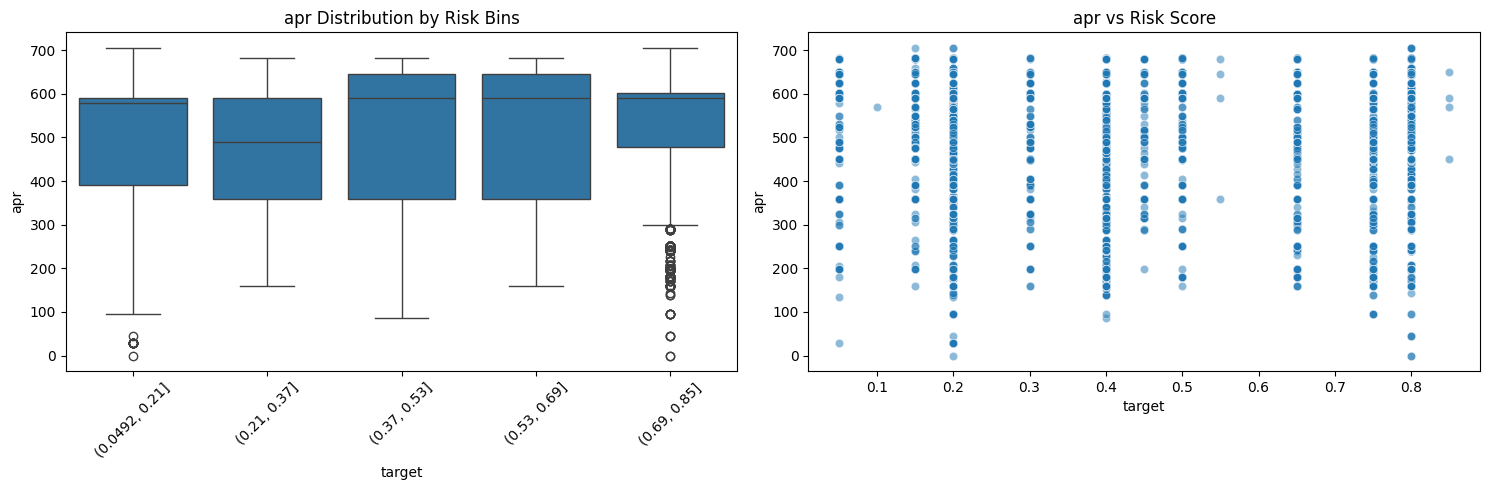

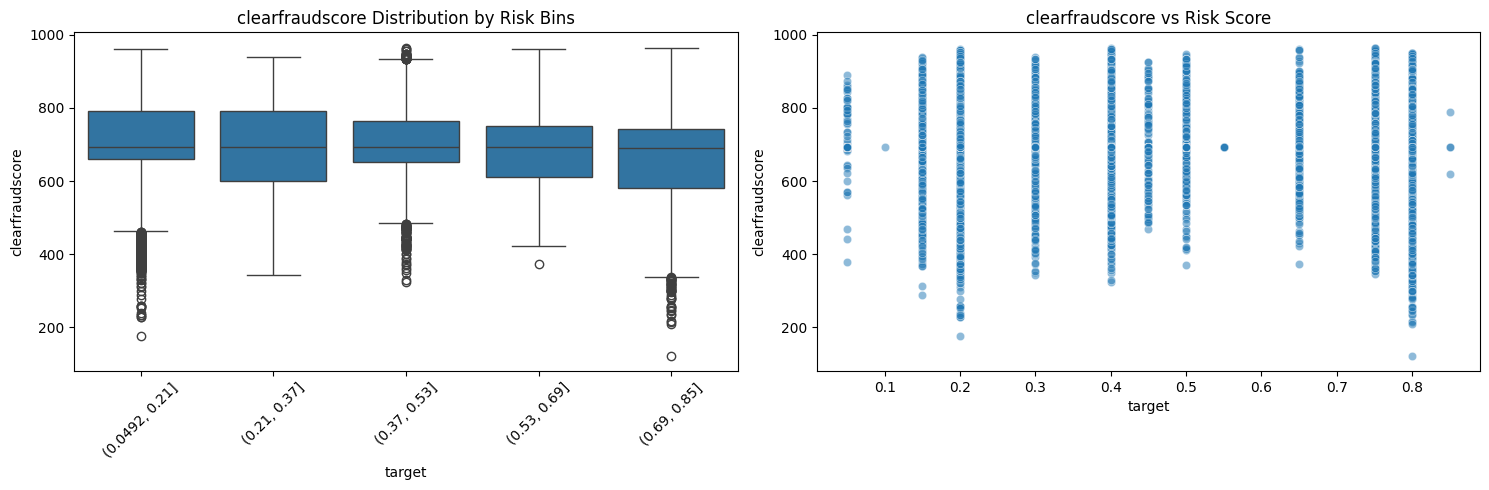

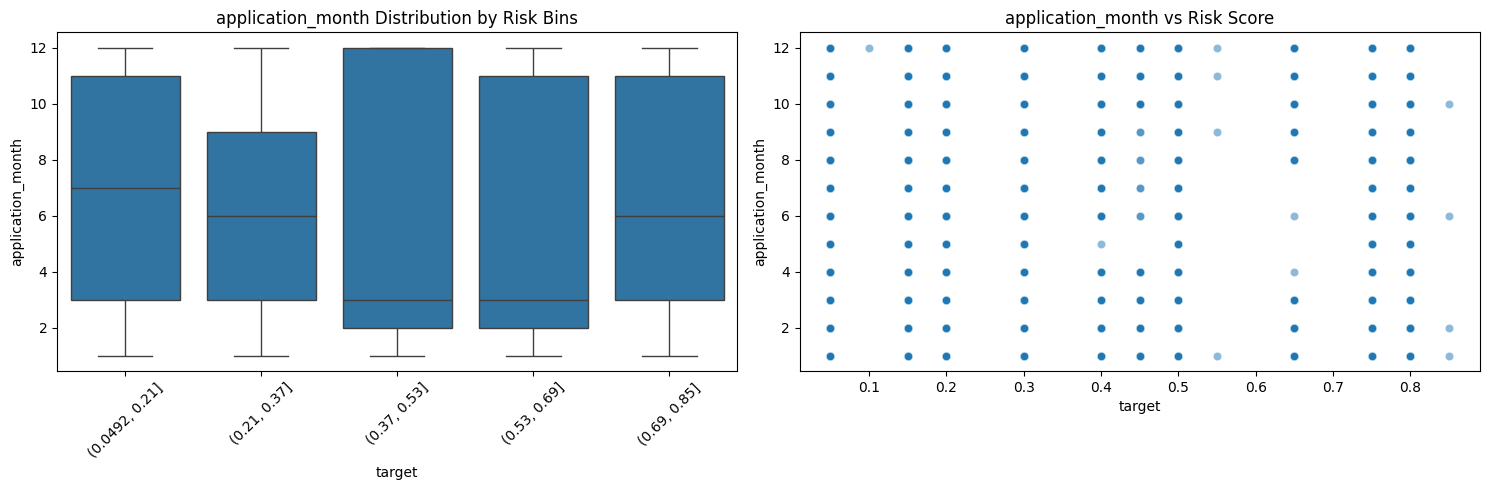

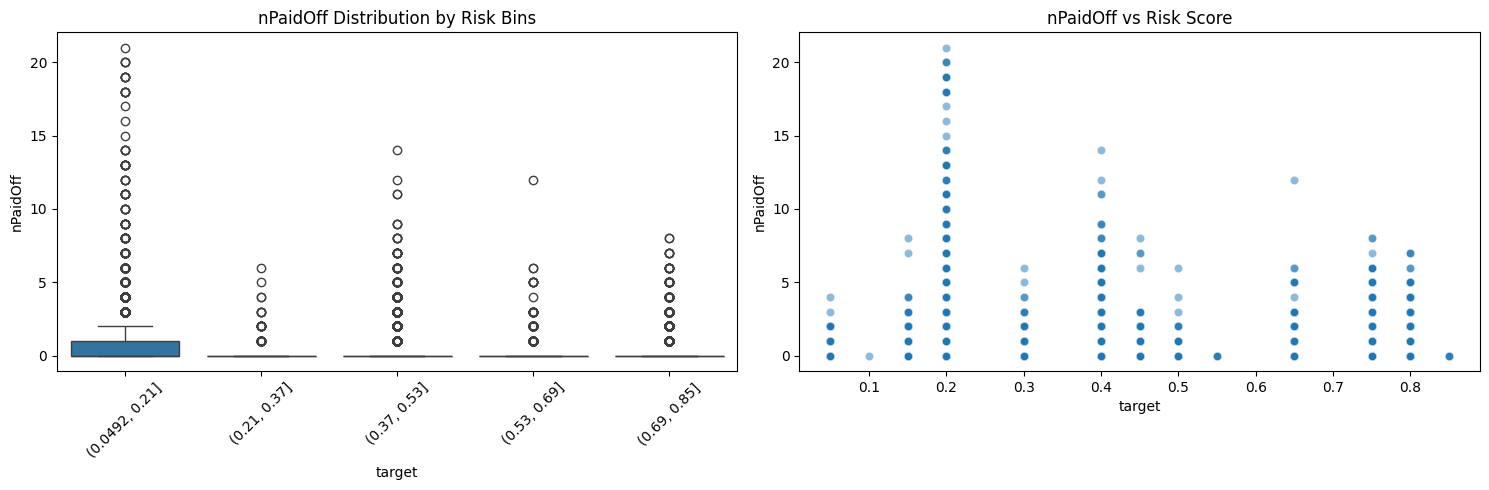

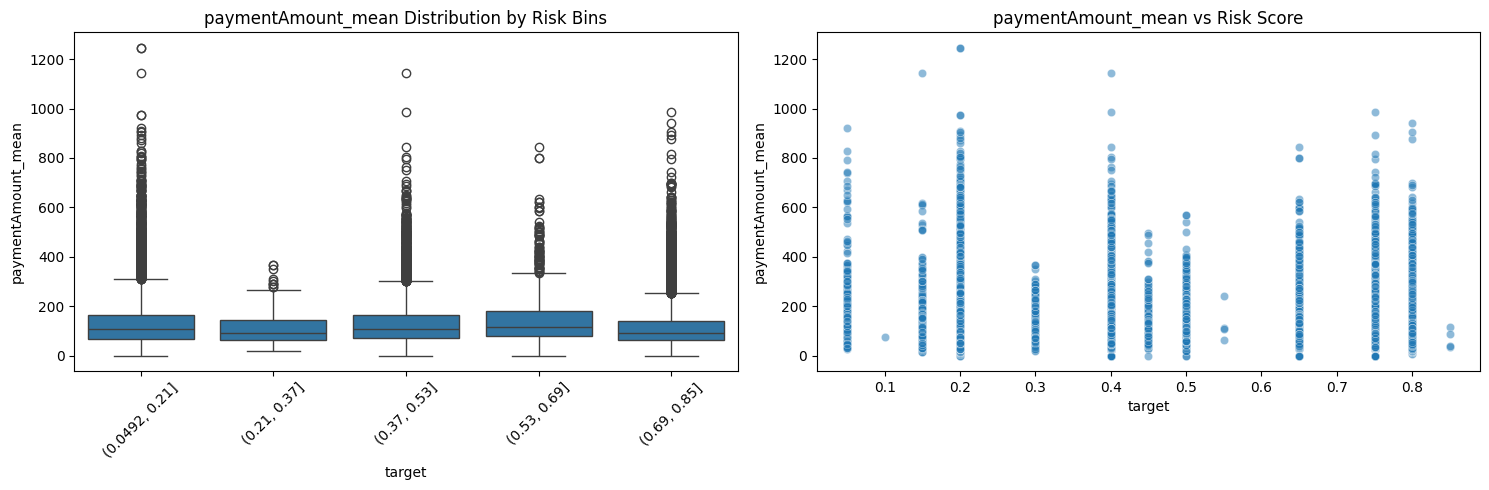

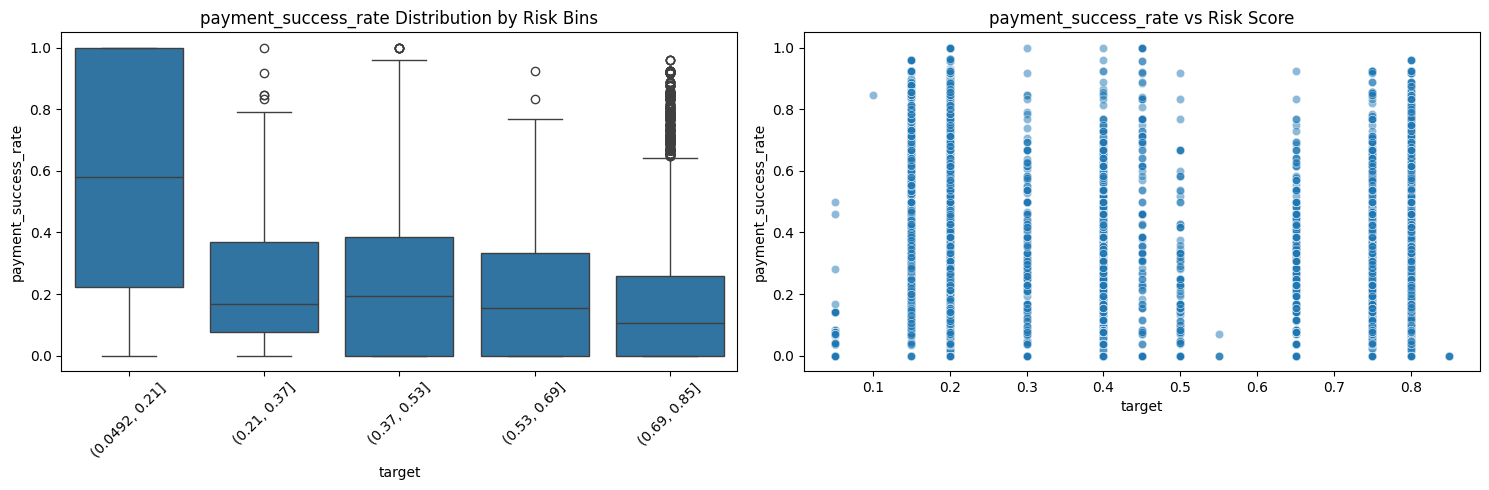

In [26]:
def plot_feature_target_relationships(df, features, target='target', figsize=(15, 5)):
    """
    Visualize relationships between features and target variable
    
    Args:
        df (pd.DataFrame): Processed dataframe
        features (list): Features to analyze
        target (str): Target column name
        figsize (tuple): Figure size
    """
    for feature in features:
        if feature in df.columns:
            plt.figure(figsize=figsize)
            
            # Numeric feature analysis
            if pd.api.types.is_numeric_dtype(df[feature]):
                plt.subplot(1, 2, 1)
                sns.boxplot(x=pd.cut(df[target], bins=5), y=df[feature])
                plt.title(f'{feature} Distribution by Risk Bins')
                plt.xticks(rotation=45)
                
                plt.subplot(1, 2, 2)
                sns.scatterplot(x=df[target], y=df[feature], alpha=0.5)
                plt.title(f'{feature} vs Risk Score')
            
            # Categorical feature analysis
            else:
                target_means = df.groupby(feature)[target].mean().sort_values(ascending=False)
                plt.bar(target_means.index, target_means.values)
                plt.title(f'Mean Risk Score by {feature}')
                plt.xticks(rotation=45, ha='right')
            
            plt.tight_layout()
            plt.show()

# Select important features to examine
important_features = [
    'loanAmount', 'apr', 'clearfraudscore', 
    'application_month', 'nPaidOff',
    'paymentAmount_mean', 'payment_success_rate'
]

# Plot relationships
plot_feature_target_relationships(processed_df, important_features)

### 5.3 Target Distribution Analysis

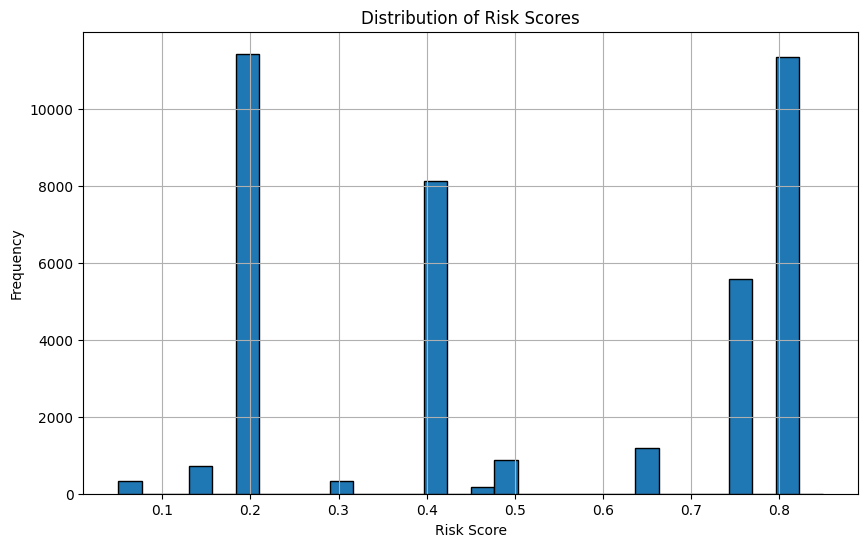


Risk Score Statistics:
count    40036.000000
mean         0.506376
std          0.258363
min          0.050000
25%          0.200000
50%          0.400000
75%          0.800000
max          0.850000
Name: target, dtype: float64


In [27]:
plt.figure(figsize=(10, 6))
processed_df['target'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()

print("\nRisk Score Statistics:")
print(processed_df['target'].describe())

### 5.4 Feature Importance

Relationship between numeric features and target variable.

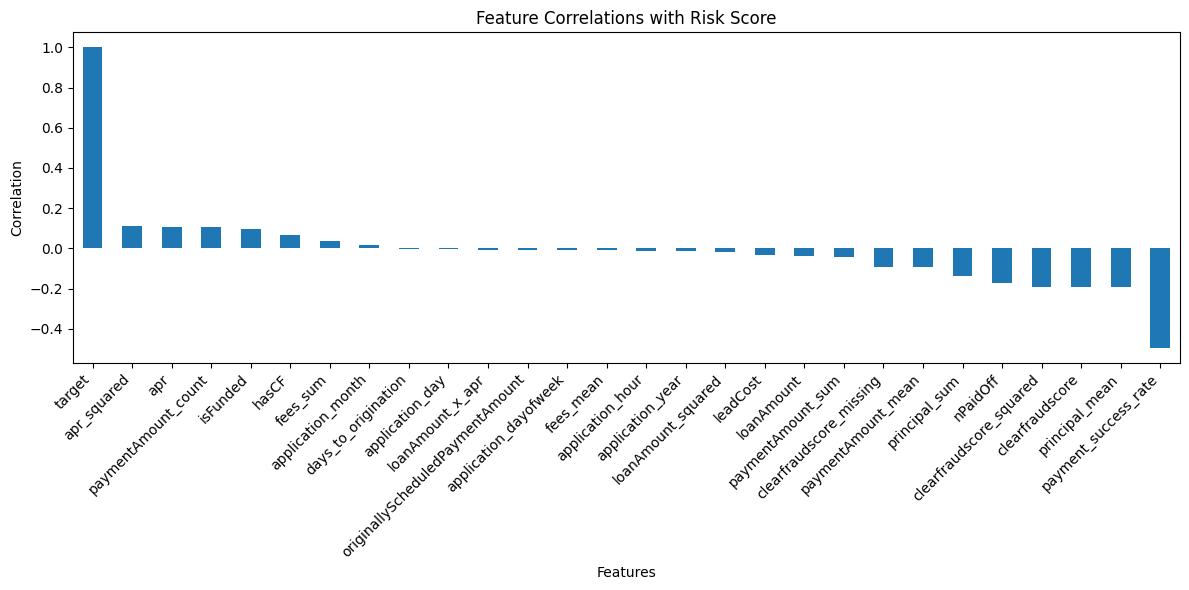


Top 10 Features by Correlation with Risk Score:
target                 1.000000
apr_squared            0.112818
apr                    0.107452
paymentAmount_count    0.104060
isFunded               0.096023
hasCF                  0.064119
fees_sum               0.037783
application_month      0.014360
days_to_origination   -0.001452
application_day       -0.003778
dtype: float64


In [28]:
# Calculate correlations with target
target_correlations = processed_df[numeric_features].corrwith(processed_df['target']).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
target_correlations.plot(kind='bar')
plt.title('Feature Correlations with Risk Score')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTop 10 Features by Correlation with Risk Score:")
print(target_correlations.head(10))

## 6. Data Quality Checks

In [29]:
def data_quality_report(df):
    """
    Generate a comprehensive data quality report
    
    Args:
        df (pd.DataFrame): Input dataframe
    """
    print("Data Quality Report:")
    print(f"Total Rows: {len(df)}")
    print(f"Total Columns: {len(df.columns)}")
    
    print("\nMissing Values:")
    missing_values = df.isnull().sum()
    missing_pct = 100 * missing_values / len(df)
    missing_summary = pd.concat([missing_values, missing_pct], axis=1, keys=['Missing Count', 'Missing Percentage'])
    print(missing_summary[missing_summary['Missing Count'] > 0])
    
    print("\nData Types:")
    print(df.dtypes)

# Generate data quality report
data_quality_report(processed_df)

Data Quality Report:
Total Rows: 40036
Total Columns: 39

Missing Values:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []

Data Types:
loanId                               object
anon_ssn                             object
payFrequency                         object
apr                                 float64
originated                             bool
nPaidOff                            float64
approved                               bool
isFunded                              int64
loanStatus                           object
loanAmount                          float64
originallyScheduledPaymentAmount    float64
state                                object
leadType                             object
leadCost                              int64
fpStatus                             object
clarityFraudId                       object
hasCF                                 int64
underwritingid                       object
clearfraudscore                     float64
paymen

## Save Processed Data

Save processed data for model training.

In [30]:
# Save processed data
output_path = os.path.join(data_storage_config['processed_data_dir'], 'feature_engineered_data.parquet')
processed_df.to_parquet(output_path)

print(f"Processed data saved to: {output_path}")

Processed data saved to: ../data/processed\feature_engineered_data.parquet


Double Checking

In [36]:
print(processed_df.head())

          loanId                          anon_ssn payFrequency    apr  \
0  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
1  LL-I-12263369  accf40708233e8b7d05fcb89d5a9c081            B  475.0   
2  LL-I-17826953  7529d29c9d943cc55bc71a85d9c6b7a3            W  645.0   
3  LL-I-16519347  bc9fa73468acf18cb968a3a6a3c4697c            S  490.0   
4  LL-I-11506719  10cefd11d41612b032fd9cd2debe32dc            B  590.0   

   originated  nPaidOff  approved  isFunded     loanStatus  loanAmount  \
0        True       0.0      True         1  Paid Off Loan      3000.0   
1        True       2.0      True         1       New Loan       350.0   
2        True       0.0      True         1       New Loan       400.0   
3        True       2.0      True         1  Paid Off Loan      1250.0   
4        True       0.0      True         1  Paid Off Loan       800.0   

   originallyScheduledPaymentAmount state     leadType  leadCost fpStatus  \
0                           6395.